In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# Load the data
df = pd.read_csv('./data/data.csv', sep=';')
df.head()

,timestamp,V005_vent01_CO2,V022_vent02_CO2,V006_vent01_temp_out,V023_vent02_temp_out
0,23.06.2012 01:00,494.172532,405.514287,22.700000,23.449972
1,23.06.2012 02:00,491.992574,404.705170,22.700000,23.400000
2,23.06.2012 03:00,490.003467,401.981443,22.628444,23.400000
3,23.06.2012 04:00,490.972327,402.471192,22.600000,23.400000
4,23.06.2012 05:00,489.132106,403.174487,22.600000,23.349972


In [4]:
# Creating a DataFrame
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d.%m.%Y %H:%M')

# Extracting the hour from the timestamp
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].apply(lambda x: str(x).split(' ')[0])

# Melting the DataFrame for seaborn boxplot
df_melted = pd.melt(df, id_vars=['hour'], value_vars=['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out'])


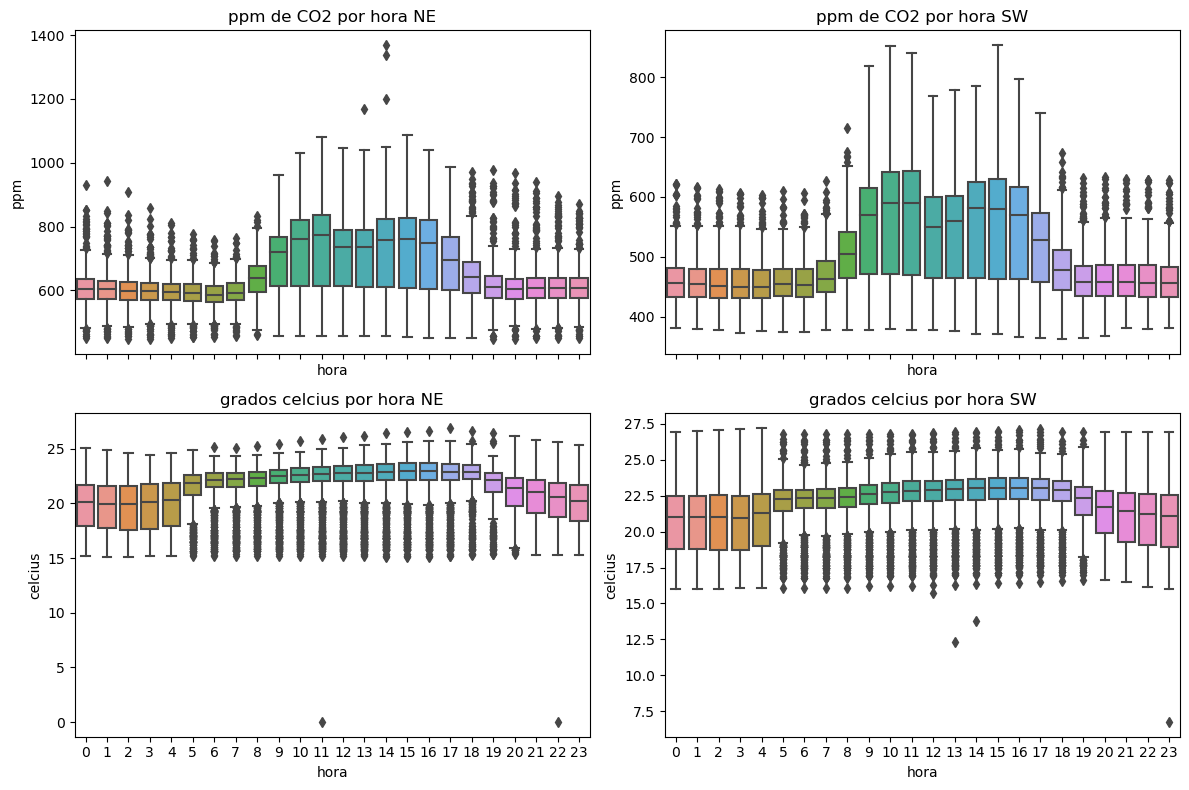

In [5]:
# Create the box plot
#timestamp;V005_vent01_CO2;V022_vent02_CO2;V006_vent01_temp_out;V023_vent02_temp_out
top_variables = ['V005_vent01_CO2', 'V022_vent02_CO2']
bottom_variables = ['V006_vent01_temp_out', 'V023_vent02_temp_out']
directions = ['NE', 'SW']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)

for i, variable in enumerate(top_variables):
    sns.boxplot(x='hour', y=variable, data=df, ax=axes[0][i])
    axes[0][i].set_title(f'ppm de CO2 por hora {directions[i]}')
    axes[0][i].set_ylabel('ppm')
    axes[0][i].set_xlabel('hora')

for i, variable in enumerate(bottom_variables):
    sns.boxplot(x='hour', y=variable, data=df, ax=axes[1][i])
    axes[1][i].set_title(f'grados celcius por hora {directions[i]}')
    axes[1][i].set_ylabel('celcius')
    axes[1][i].set_xlabel('hora')

# Adjust layout
plt.tight_layout()
plt.show()

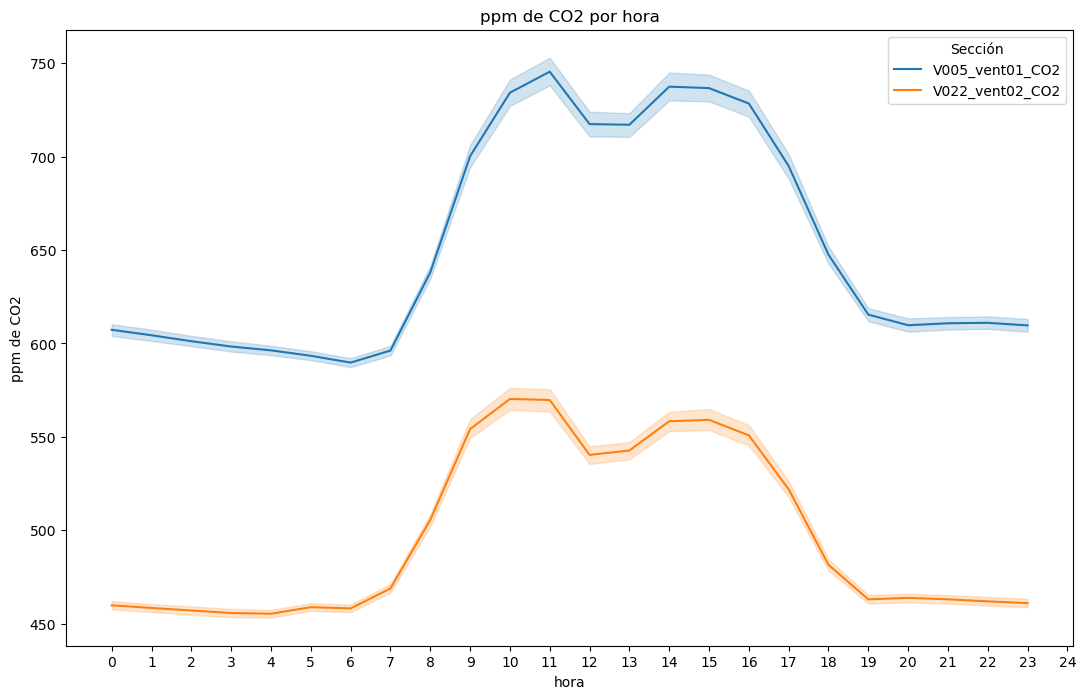

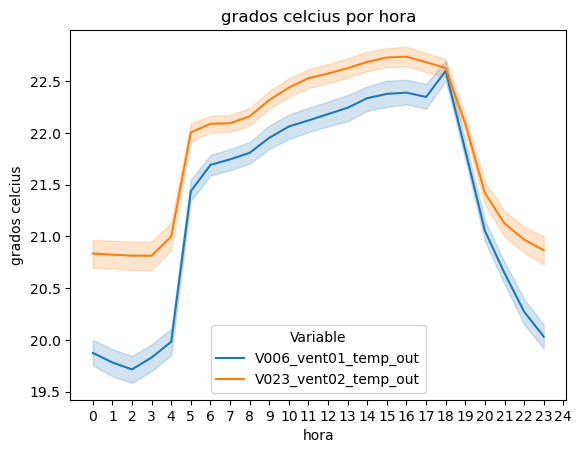

In [6]:
vent_variables = ['V005_vent01_CO2', 'V022_vent02_CO2']
temp_variables = ['V006_vent01_temp_out', 'V023_vent02_temp_out']
plt.figure(figsize=(13, 8))

for variable in vent_variables:
    sns.lineplot(x='hour', y=variable, data=df, label=variable)

plt.title('ppm de CO2 por hora')
plt.xlabel('hora')
plt.ylabel('ppm de CO2')
plt.legend(title='Sección')
plt.xticks(np.arange(0, 25, 1))
plt.show()

for variable in temp_variables:
    sns.lineplot(x='hour', y=variable, data=df, label=variable)

plt.title('grados celcius por hora')
plt.xlabel('hora')
plt.ylabel('grados celcius')
plt.legend(title='Variable')
plt.xticks(np.arange(0, 25, 1))
plt.show()

In [25]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

tsne_dimension_reduced_values = []
variables = ['V005_vent01_CO2', 'V022_vent02_CO2', 'V006_vent01_temp_out', 'V023_vent02_temp_out']
# variables = ['V005_vent01_CO2']

df_grouped_by_day = []

for variable in variables:
    df_grouped_by_day.append(df[[variable, 'hour', 'day']].pivot_table(values=variable, columns='hour', index='day', fill_value=0))


# display(df[['V005_vent01_CO2', 'hour', 'day']])
# print(testing)
# print(f'df shape {df.shape}')
# print(f'shape {testing.shape}')
for i in range(len(variables)):
    # display(df_grouped_by_day[i])
    # tsne = TSNE(n_components=1, random_state=1)
    # tsne = TSNE(n_components=2, random_state=1)
    tsne = PCA(n_components=2, random_state=1)
    tsne_dimension_reduced_values.append(tsne.fit_transform(df_grouped_by_day[i]))
    # print(f'{variables[i]} divergence: {tsne.kl_divergence_}')
    print(f'{variables[i]} divergence: {tsne.mean_}')

V005_vent01_CO2 divergence: [606.76490523 604.38350847 601.19827946 598.35437354 596.30816055
 592.84683976 589.74965955 596.20027886 638.03095059 700.30636423
 734.29105196 745.54887781 717.48450367 717.13201912 737.53891361
 736.75609946 728.50025698 695.00908792 647.50639016 615.45198542
 609.75508107 610.80982737 611.0659464  609.66259168]
V022_vent02_CO2 divergence: [459.34740308 458.33465327 456.98133962 455.63168407 455.25025172
 458.3421796  458.10664465 468.79430755 505.48854389 554.14434779
 570.28112671 569.71618159 540.30363953 542.67777619 558.32483431
 559.08994301 550.77298358 521.89974876 481.44710762 462.95308713
 463.74848783 462.96583752 461.87090121 460.95417505]
V006_vent01_temp_out divergence: [19.85574774 19.76331117 19.71500967 19.82969706 19.98204218 21.41669986
 21.69012575 21.74414101 21.80686384 21.95248456 22.06172407 22.12014192
 22.18136707 22.24258515 22.33520412 22.37670399 22.38864049 22.34660057
 22.5983487  21.83012508 21.05382332 20.64476035 20.2727

In [26]:
import plotly.express as px

for i in range(len(variables)):
    print(len(tsne_dimension_reduced_values[i][:, 0]))
    # fig = px.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=[0] * len(tsne_dimension_reduced_values[i][:, 0]), title=f'{variables[i]} t-SNE')
    fig = px.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=tsne_dimension_reduced_values[i][:, 1], title=f'{variables[i]} t-SNE')
    fig.show()


1081


1081


1081


1081


---- variable V005_vent01_CO2 ----
KMEANS


C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

score by k: [0.6421067032008171, 0.603466794192168, 0.5438507504841676, 0.5230492774402237, 0.5231502760435195, 0.5237508306461665]
kmeans max score with 2 k


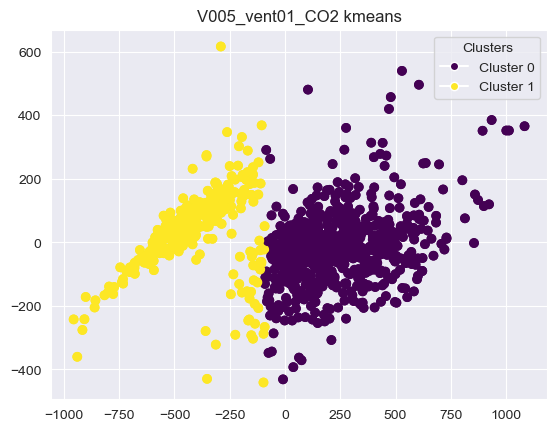

AGLOMERATIVO JERARQUICO
score by k: [0.6120671453299196, 0.5082058123921884, 0.5168936017996695, 0.48838482026089625, 0.47027447985582954, 0.413611205239246]
agglomerative score max score with 2 k


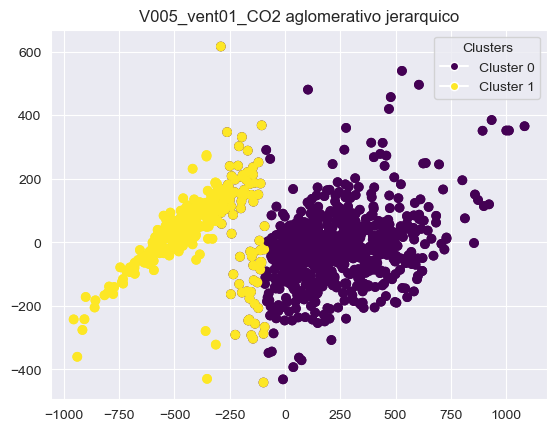

---- variable V022_vent02_CO2 ----
KMEANS


C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

score by k: [0.6421067032008171, 0.603466794192168, 0.5438507504841676, 0.5230492774402237, 0.5231502760435195, 0.5237508306461665, 0.621590236323389, 0.6037263806972356, 0.5522152977996273, 0.5329600556388532, 0.5215281985195573, 0.5341205511039349]
kmeans max score with 2 k


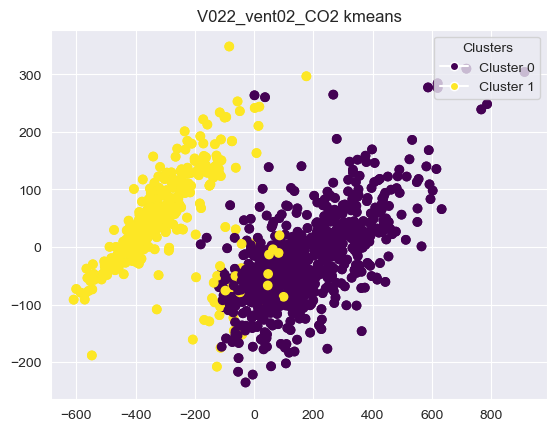

AGLOMERATIVO JERARQUICO
score by k: [0.6120671453299196, 0.5082058123921884, 0.5168936017996695, 0.48838482026089625, 0.47027447985582954, 0.413611205239246, 0.43039979127706735, 0.5933086608043676, 0.583663958308268, 0.507042694194054, 0.4912540914572146, 0.4618195887496965]
agglomerative score max score with 2 k


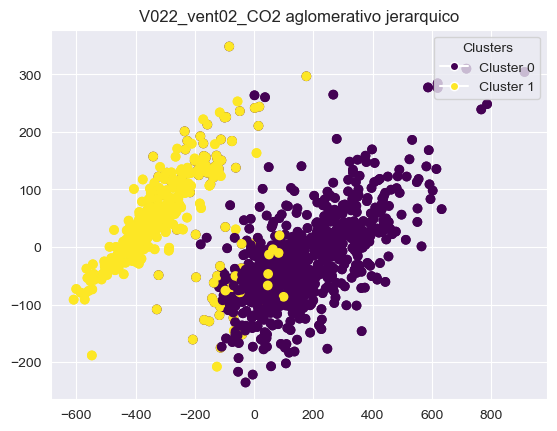

---- variable V006_vent01_temp_out ----
KMEANS


C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

score by k: [0.6421067032008171, 0.603466794192168, 0.5438507504841676, 0.5230492774402237, 0.5231502760435195, 0.5237508306461665, 0.621590236323389, 0.6037263806972356, 0.5522152977996273, 0.5329600556388532, 0.5215281985195573, 0.5341205511039349, 0.6077369911661967, 0.6351964528419071, 0.5580512611281997, 0.525397111599563, 0.5153921877982555, 0.5504862674562643]
kmeans max score with 2 k


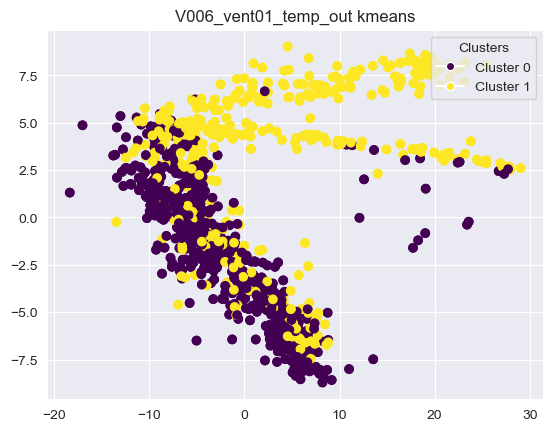

AGLOMERATIVO JERARQUICO
score by k: [0.6120671453299196, 0.5082058123921884, 0.5168936017996695, 0.48838482026089625, 0.47027447985582954, 0.413611205239246, 0.43039979127706735, 0.5933086608043676, 0.583663958308268, 0.507042694194054, 0.4912540914572146, 0.4618195887496965, 0.5942168338289957, 0.6386430693929315, 0.5271270020177244, 0.5114885643483322, 0.4701855399743961, 0.4626644376790249]
agglomerative score max score with 15 k


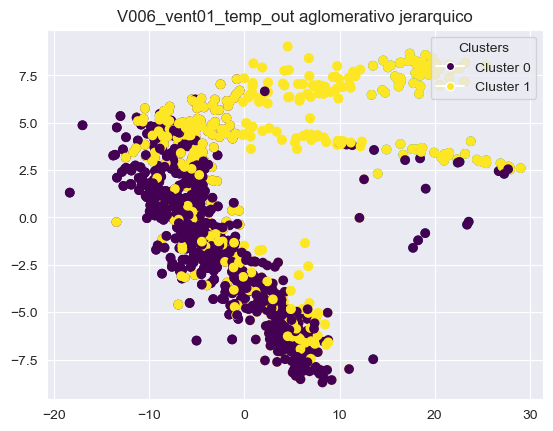

---- variable V023_vent02_temp_out ----
KMEANS


C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\yop_d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

score by k: [0.6421067032008171, 0.603466794192168, 0.5438507504841676, 0.5230492774402237, 0.5231502760435195, 0.5237508306461665, 0.621590236323389, 0.6037263806972356, 0.5522152977996273, 0.5329600556388532, 0.5215281985195573, 0.5341205511039349, 0.6077369911661967, 0.6351964528419071, 0.5580512611281997, 0.525397111599563, 0.5153921877982555, 0.5504862674562643, 0.6276468144291707, 0.5203761200319682, 0.5328012938043276, 0.5258338528189025, 0.5262343920349224, 0.5477242614315657]
kmeans max score with 2 k


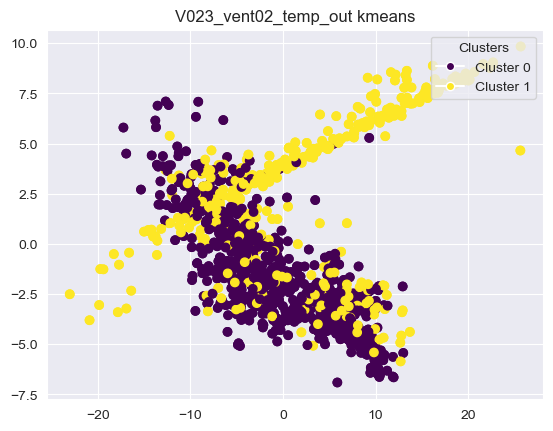

AGLOMERATIVO JERARQUICO
score by k: [0.6120671453299196, 0.5082058123921884, 0.5168936017996695, 0.48838482026089625, 0.47027447985582954, 0.413611205239246, 0.43039979127706735, 0.5933086608043676, 0.583663958308268, 0.507042694194054, 0.4912540914572146, 0.4618195887496965, 0.5942168338289957, 0.6386430693929315, 0.5271270020177244, 0.5114885643483322, 0.4701855399743961, 0.4626644376790249, 0.4787288512920809, 0.35316988539709, 0.315364624052222, 0.5119826626361373, 0.4960967194121263, 0.4974745564119699]
agglomerative score max score with 15 k


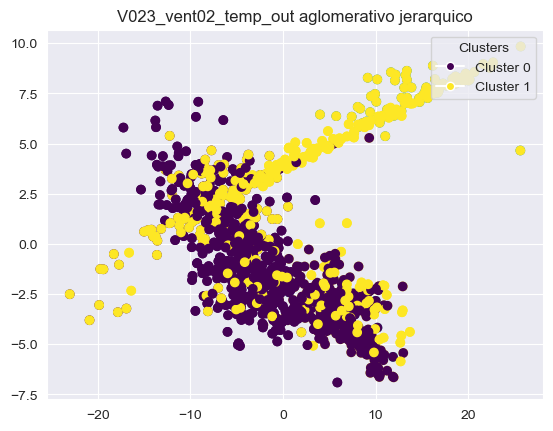

In [29]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from datetime import datetime

K = range(2, 8)
kmeans_fits = []
agglomerative_fits = []
kmeans_score = []
agglomerative_score = []

for i in range(len(variables)):
    data = tsne_dimension_reduced_values[i][:, 0]
    print(f'---- variable {variables[i]} ----')
    # KMEANS
    print('KMEANS')
    for k in K:
        model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data.reshape(-1, 1))
        kmeans_fits.append(model)
        kmeans_score.append(silhouette_score(data.reshape(-1,1), model.labels_, metric='euclidean'))

    print(f'score by k: {kmeans_score}')
    kmeans_score_max_index = np.argmax(kmeans_score)
    print(f'kmeans max score with {kmeans_score_max_index + 2} k') # +2 because the range starts at 2

    # plt.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=[0] * len(tsne_dimension_reduced_values[i][:, 0]), c=kmeans_fits[kmeans_score_max_index].labels_, cmap='viridis')
    plt.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=tsne_dimension_reduced_values[i][:, 1], c=kmeans_fits[kmeans_score_max_index].labels_, cmap='viridis')
    plt.title(f'{variables[i]} kmeans')
    
    scatter = plt.scatter(x=tsne_dimension_reduced_values[i][:, 0],
                          y=tsne_dimension_reduced_values[i][:, 1],
                          c=kmeans_fits[kmeans_score_max_index].labels_,
                          cmap='viridis')
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                        markerfacecolor=scatter.cmap(scatter.norm(cluster)))
          for cluster in np.unique(kmeans_fits[kmeans_score_max_index].labels_)]
    plt.legend(handles=handles, title='Clusters', loc='upper right')

    plt.show()

    # AGLOMERATIVO JERARQUICO
    print('AGLOMERATIVO JERARQUICO')
    for k in K:
        model = AgglomerativeClustering(linkage="complete", n_clusters=k).fit(data.reshape(-1, 1))
        agglomerative_fits.append(model)
        agglomerative_score.append(silhouette_score(data.reshape(-1,1), model.labels_, metric='euclidean'))

    print(f'score by k: {agglomerative_score}')
    agglomerative_score_max_index = np.argmax(agglomerative_score)
    print(f'agglomerative score max score with {agglomerative_score_max_index + 2} k') # +2 because the range starts at 2
    # plt.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=[0] * len(tsne_dimension_reduced_values[i][:, 0]), c=agglomerative_fits[agglomerative_score_max_index].labels_, cmap='viridis')
    plt.scatter(x=tsne_dimension_reduced_values[i][:, 0], y=tsne_dimension_reduced_values[i][:, 1], c=agglomerative_fits[agglomerative_score_max_index].labels_, cmap='viridis')
    plt.title(f'{variables[i]} aglomerativo jerarquico')
    scatter = plt.scatter(x=tsne_dimension_reduced_values[i][:, 0],
                          y=tsne_dimension_reduced_values[i][:, 1],
                          c=kmeans_fits[kmeans_score_max_index].labels_,
                          cmap='viridis')
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                        markerfacecolor=scatter.cmap(scatter.norm(cluster)))
          for cluster in np.unique(kmeans_fits[kmeans_score_max_index].labels_)]
    plt.legend(handles=handles, title='Clusters', loc='upper right')

    # Para agregar el día de la semana al plot
    # for j in range(len(tsne_dimension_reduced_values[i][:, 0])): 
    #     plt.text(tsne_dimension_reduced_values[i][:, 0][j], tsne_dimension_reduced_values[i][:, 1][j], datetime.strptime(df_grouped_by_day[i].index[j], '%Y-%m-%d').strftime('%A') , horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.show()